### Description:

In this task you will work with software AES-128 running on ESP32. 

You have access to plaintexts, ciphertexts and associated traces.
Oscilloscope snapshot (see below) shows an entire AES execution. You will have only the part related to the beginning of encryption.

The measurements were performed with LeCroy WaveRunner Zi625 and a differential probe

### Tips:

A 'trace' is a side-channel information measured between the VCC and the GND pins of the WROOM module (ESP32). 

In this example a trace is a 50000 bytes long array of int8 (the amplitude of the measured voltage).

This array contains various encryption information measured with noise.

### Task:

You will have several tasks this time, they are all describe below.


The master key is in the form of SCA{XXXXXXXXXXX}, where X is a ASCII printable symbol.

### AES-128 encryption measured at high sampling rate

Green signal - a GPIO trigger used to synchronize all the traces

Red signal   - VCC voltage variation during AES-128 encryption

<img src="support/osc_snap.png">

In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import binascii
import h5py
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib

import sca_training

numfiles    = 10
numtraces_per_file = 1000

numtraces   = 10000
numsamples  = 50000

%matplotlib widget

#----------------------------------------------------------------------------
# OUTPUTS:
#     ptexts   - input plaintexts converted to numpy array of uint8
#     ctexts   - resulted ciphertext converted to numpy array of uint8
#     traces   - a trace associated with encryption process
#----------------------------------------------------------------------------

def ReadData():
    global numtraces
    global numsamples
    global numfiles
    global numtraces_per_file
    
    traces = np.zeros((numtraces, numsamples), dtype = np.int8)
    ptexts = np.zeros((numtraces, 16), dtype = np.uint8)
    ctexts = np.zeros((numtraces, 16), dtype = np.uint8)
    
    print('Reading data...')
    for i_file in range(numfiles):
        h5file = r'../data/aes_{}'.format(i_file * numtraces_per_file) + r'.hdf5' 
        print('Reading {}...'.format(h5file))
    
        with h5py.File(h5file, 'r') as hdf5_file:
            ptexts[(i_file*numtraces_per_file):((i_file + 1)*numtraces_per_file),:] = hdf5_file['ptexts'][:,:].astype('uint8')
            ctexts[(i_file*numtraces_per_file):((i_file + 1)*numtraces_per_file),:] = hdf5_file['ctexts'][:,:].astype('uint8')
            traces[(i_file*numtraces_per_file):((i_file + 1)*numtraces_per_file),:] = hdf5_file['traces'][:,:].astype('int8')
    
    
    print('Ptexts size:', ptexts.shape)
    print(ptexts)
    print('Ctexts size:', ctexts.shape)
    print(ctexts)
    print('Traces size:', traces.shape)
    print(traces)
    print('Completed')
    
    return ptexts, ctexts, traces

In [8]:
ptexts, ctexts, traces = ReadData()

Reading data...
Reading ../data/aes_0.hdf5...
Reading ../data/aes_1000.hdf5...
Reading ../data/aes_2000.hdf5...
Reading ../data/aes_3000.hdf5...
Reading ../data/aes_4000.hdf5...
Reading ../data/aes_5000.hdf5...
Reading ../data/aes_6000.hdf5...
Reading ../data/aes_7000.hdf5...
Reading ../data/aes_8000.hdf5...
Reading ../data/aes_9000.hdf5...
Ptexts size: (10000, 16)
[[223  76 170 ...   3 242 135]
 [223  76 170 ...   3 242 135]
 [147  55  27 ... 208 136 153]
 ...
 [232  50 156 ... 197   2 113]
 [180  37 106 ... 173 208 252]
 [209  92 189 ...  30 163 224]]
Ctexts size: (10000, 16)
[[ 66  91  61 ... 225 145 183]
 [ 66  91  61 ... 225 145 183]
 [189 102 147 ... 196 215  14]
 ...
 [208 111  37 ... 120 115 246]
 [156  26 208 ... 207 125 147]
 [ 15  44  11 ... 235 169  58]]
Traces size: (10000, 50000)
[[35 20 39 ... 19 20 26]
 [29 26 41 ...  9 38 34]
 [12 42 41 ... 18 40 14]
 ...
 [35 25 42 ... 14 20 27]
 [26 27 42 ... 11 25 37]
 [21 25 44 ... 22 39 18]]
Completed


### Task

Find the master key

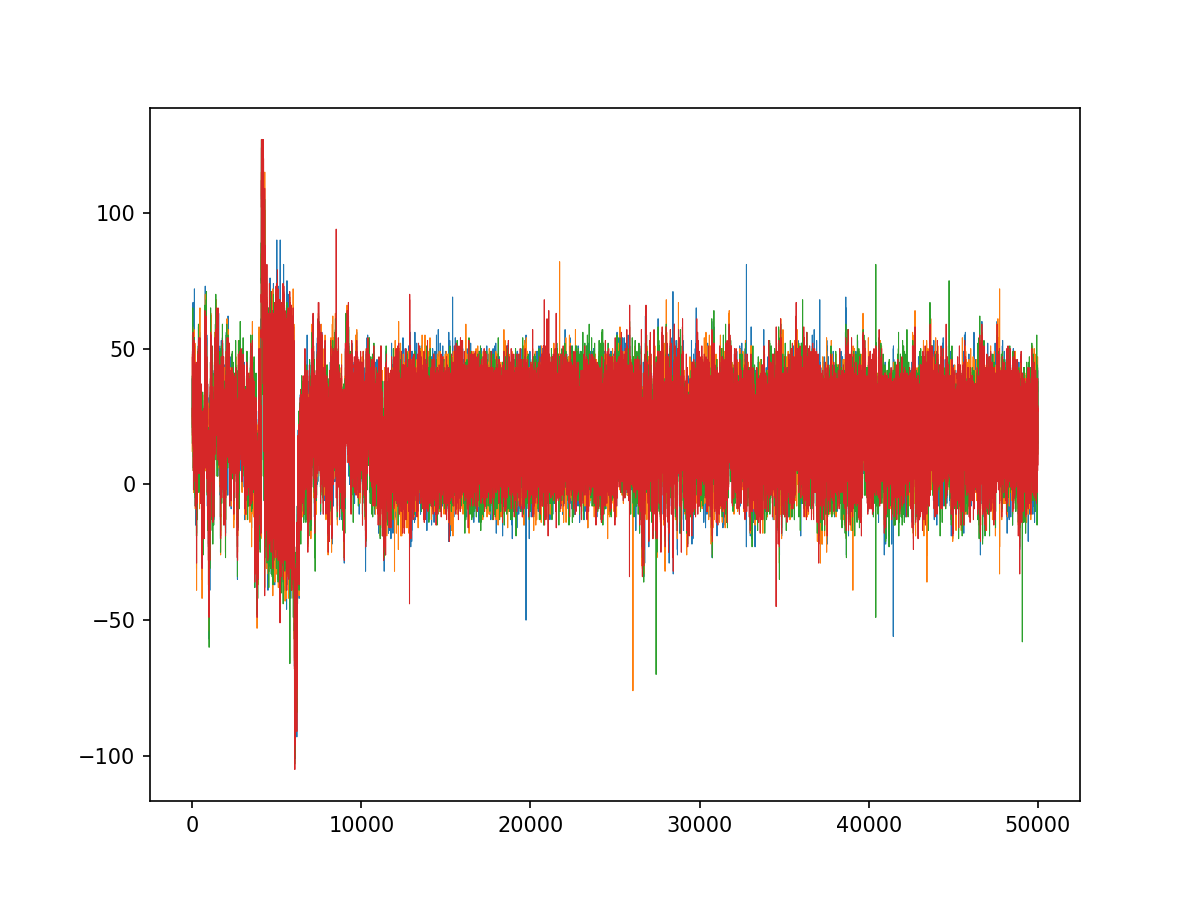

In [3]:
plt.rcParams['figure.figsize'] = (8.0,6.0)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 0.5

plt.plot(np.transpose(traces[5:9,:]))
plt.show()

In [ ]:
hw_ptext = sca_training.HW_uint8[ptexts]
hw_ctext = sca_training.HW_uint8[ctexts]

pcc_hw_ptext = sca_training.compute_correlation(traces, hw_ptext, model_block_size=16, samples_block_size=50, verbose = True)
pcc_hw_ctext = sca_training.compute_correlation(traces, hw_ctext, model_block_size=16, samples_block_size=50, verbose = True)